# Gráficos e informações para poster da EXPOTEC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [2]:
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'tp_objeto': str,
                                                   'de_tipoobjeto': str, 'vl_licitacao': float,'de_obs': str}, 
                                                    engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})
prop = pd.read_csv("propostas_licitacao.txt", sep="|", dtype={'cod_unidade_gestora': str}, error_bad_lines=False)

Skipping line 144111: '|' expected after '"'
Skipping line 188932: '|' expected after '"'
Skipping line 198432: '|' expected after '"'
/home/mirian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
lic_prop = pd.merge(prop, lic, left_on=["cod_unidade_gestora","cod_tipo_licitacao","numero_licitacao"], right_on=["cd_ugestora","tp_Licitacao","nu_Licitacao"], how="left")
lic_prop_jur = pd.merge(lic_prop, jur, left_on=["de_ugestora"], right_on=["nome"], how="left")

### Quais empresas perderam todas as licitações que participaram? Dessas, quais as que mais participaram de licitações?
Fazer um gráfico de barras onde apresente no eixo-x a quantidade de licitações que a empresa participou e no eixo-y o nome da empresa, ordenado da maior para a menor quantidade de licitações.

In [6]:
propostas = (prop['nome_proponente'].value_counts().rename_axis('nome_proponente').to_frame('situacao_proposta')
                   .join(pd.crosstab(prop['nome_proponente'], prop['situacao_proposta']))
                   .reset_index())
propostas

,nome_proponente,situacao_proposta,Perdedora,Pesquisado,Vencedora
0,CIRUFARMA COMERCIAL LTDA,985,56,1,928
1,RAIMUNDO ADELMAR FONSECA PIRES,488,167,0,321
2,PNEUMAX LTDA,461,231,0,230
3,JOSE NERGINO SOBREIRA,395,28,0,367
4,TECNOCENTER MATERIAIS MEDICOS HOSPITALARES LTDA,389,28,0,361
5,VENDE TUDO MAGAZINE LTDA,343,101,0,242
6,DROGAFONTE LTDA,338,10,0,328
7,B J COMERCIO DE ALIMENTOS LTDA,328,32,0,296
8,COMERCIAL MEDEIROS LTDA,328,76,0,252
9,CRM COMERCIAL LTDA,327,26,0,301


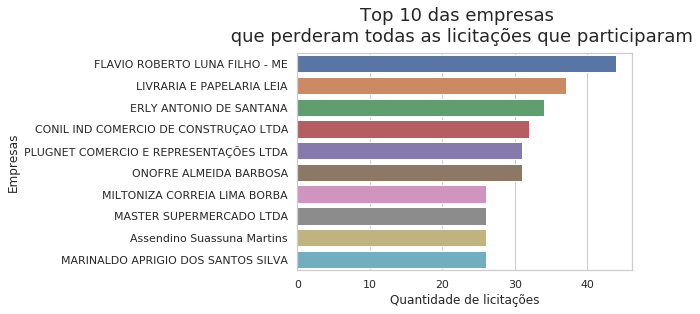

In [11]:
perdeu_tudo = propostas.loc[propostas['situacao_proposta'] == propostas['Perdedora']]
pt = perdeu_tudo[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="situacao_proposta", y="nome_proponente", data=pt, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Quantidade de licitações', ylabel='Empresas')
figure.suptitle('Top 10 das empresas \n que perderam todas as licitações que participaram', y=1.04, fontsize=18)
figure.savefig('perdeutudo.png', dpi=400, bbox_inches="tight")

### Quais as top-10 empresas que mais receberam dinheiro em licitações de municípios no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total recebido pela empresa e no eixo-y o nome da empresa, ordenado do maior para o menor valor.

In [100]:
vencedoras = lic_prop_jur.groupby(lic_prop_jur['situacao_proposta']).get_group('Vencedora')
start_date  =  '01-01-2017' 
vencedoras['dt_Homologacao'] = pd.to_datetime(vencedoras['dt_Homologacao'])
mask = vencedoras['dt_Homologacao'] > start_date
mandato = vencedoras.loc[mask]

/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


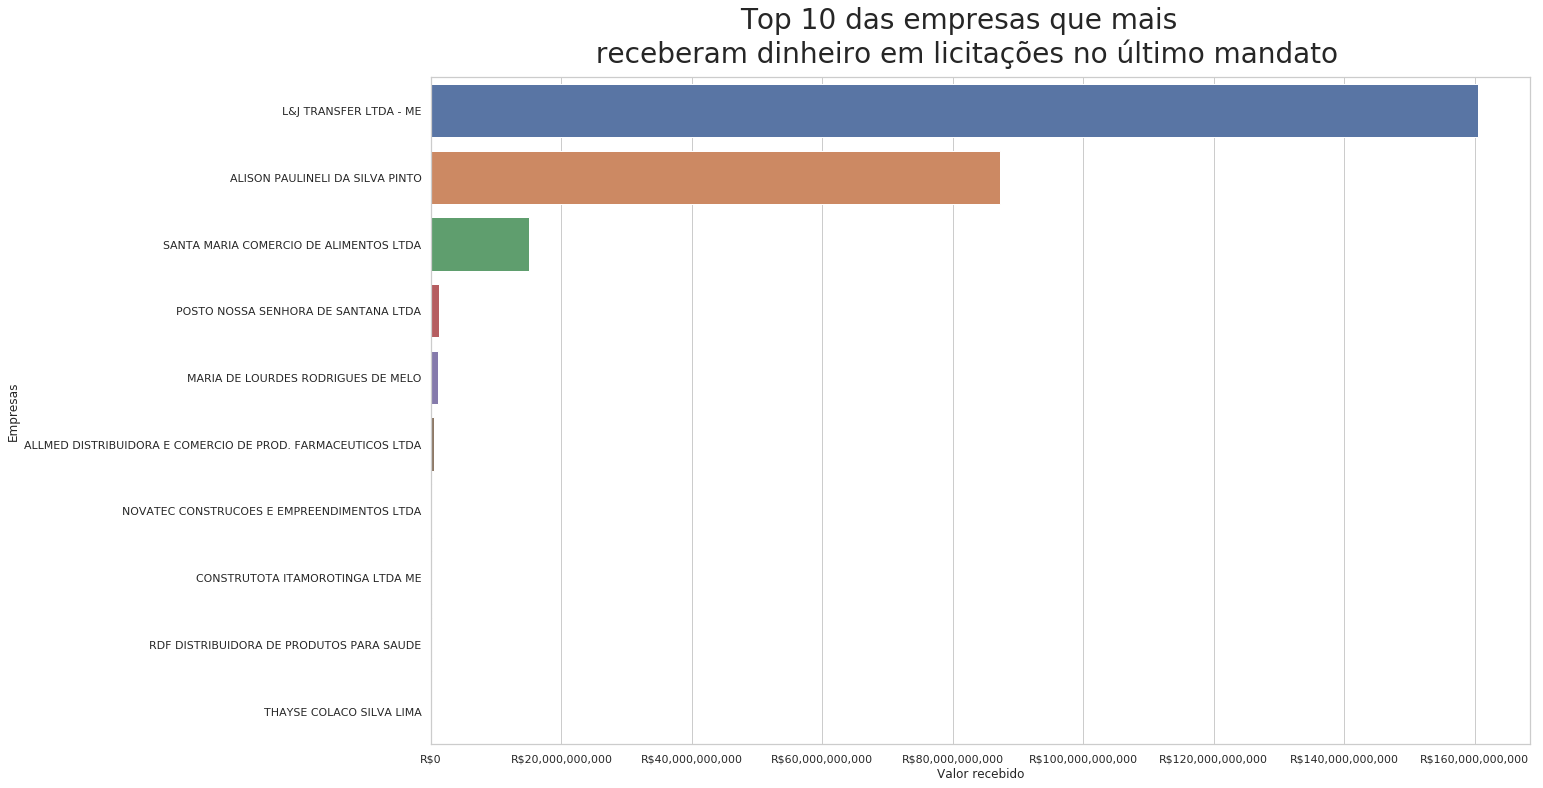

In [40]:
mais_recebeu = mandato[['nome_proponente','valor_ofertado']].groupby('valor_ofertado').sum().sort_values(by='valor_ofertado', ascending=False).reset_index()
mr = mais_recebeu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="valor_ofertado", y="nome_proponente", data=mr, ci=None)
figure = ax.get_figure()   
ax.set(xlabel='Valor recebido', ylabel='Empresas')
fmt = 'R${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
figure.suptitle('Top 10 das empresas que mais \n receberam dinheiro em licitações no último mandato', y=0.96, fontsize=28)
sns.set(rc={'figure.figsize':(19.7,12.27)})
figure.savefig('maisrecebeu.png', dpi=400, bbox_inches="tight")

In [16]:
mr

,valor_ofertado,nome_proponente
0,1.604616e+11,L&J TRANSFER LTDA - ME
1,8.726863e+10,ALISON PAULINELI DA SILVA PINTO
2,1.508259e+10,SANTA MARIA COMERCIO DE ALIMENTOS LTDA
3,1.193500e+09,POSTO NOSSA SENHORA DE SANTANA LTDA
4,1.136700e+09,MARIA DE LOURDES RODRIGUES DE MELO
5,4.494720e+08,ALLMED DISTRIBUIDORA E COMERCIO DE PROD. FARMA...
6,1.143060e+08,NOVATEC CONSTRUCOES E EMPREENDIMENTOS LTDA
7,1.130002e+08,CONSTRUTOTA ITAMOROTINGA LTDA ME
8,1.070008e+08,RDF DISTRIBUIDORA DE PRODUTOS PARA SAUDE
9,8.811009e+07,THAYSE COLACO SILVA LIMA


### Quais os top-10 municípios que mais investiram dinheiro em licitações no último mandato (de 2017 até agora)?
Fazer um gráfico de barras onde apresente no eixo-x o valor total gasto pelo município e no eixo-y o nome do município, ordenado do maior para o menor valor.

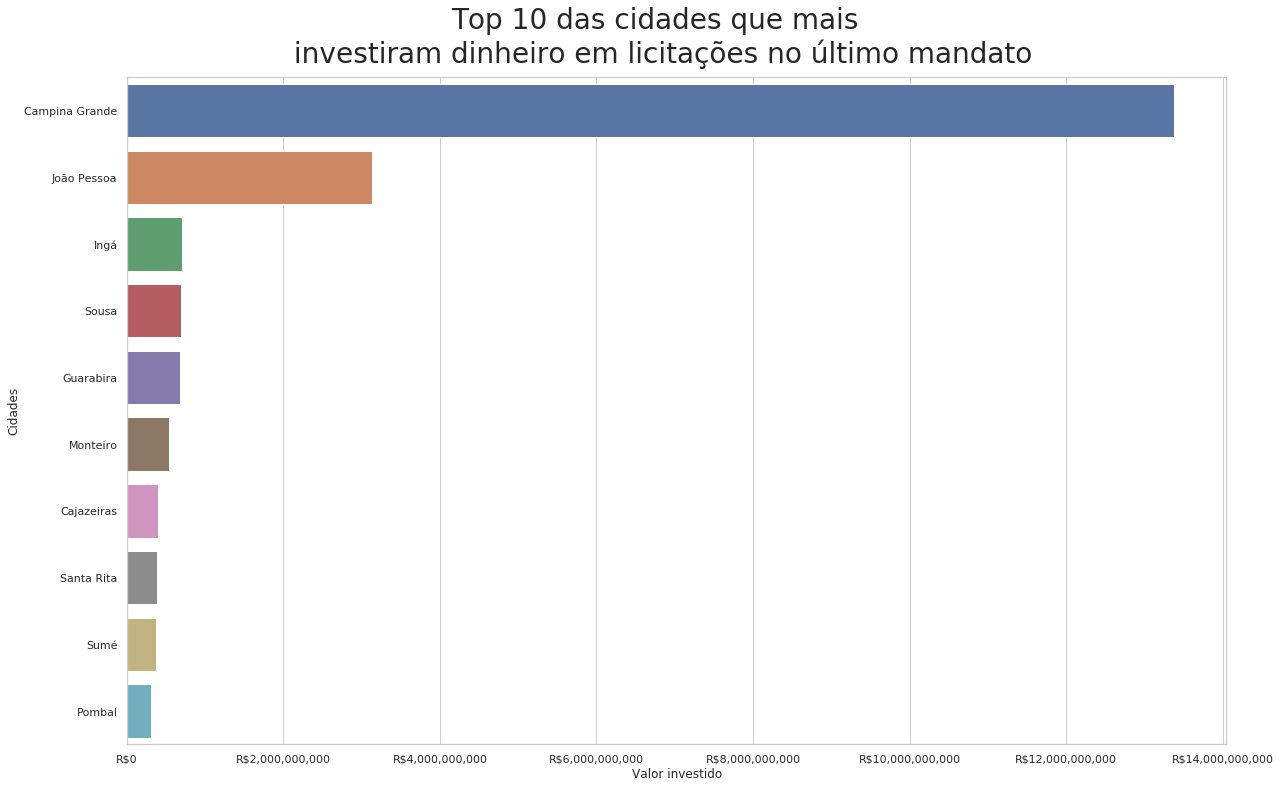

In [37]:
mais_investiu = mandato.groupby(['municipio_importacao'])['vl_Licitacao'].sum().to_frame().sort_values(by="vl_Licitacao",ascending=False).reset_index()
mi = mais_investiu[:10]
sns.set(style="whitegrid")
ax = sns.barplot(x="vl_Licitacao", y="municipio_importacao", data=mi, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Valor investido', ylabel='Cidades')
fmt = 'R${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
figure.suptitle('Top 10 das cidades que mais \n investiram dinheiro em licitações no último mandato', y=0.96, fontsize=28)
figure.savefig('maisinvestiu.png', dpi=400, bbox_inches="tight")

In [18]:
mi

,municipio_importacao,vl_Licitacao
0,Campina Grande,1.337824e+10
1,João Pessoa,3.133583e+09
2,Ingá,7.085634e+08
3,Sousa,6.895145e+08
4,Guarabira,6.816770e+08
5,Monteiro,5.340102e+08
6,Cajazeiras,3.928016e+08
7,Santa Rita,3.873288e+08
8,Sumé,3.690332e+08
9,Pombal,3.030753e+08


### Qual a quantidade total de licitações realizadas por ano?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y a quantidade.

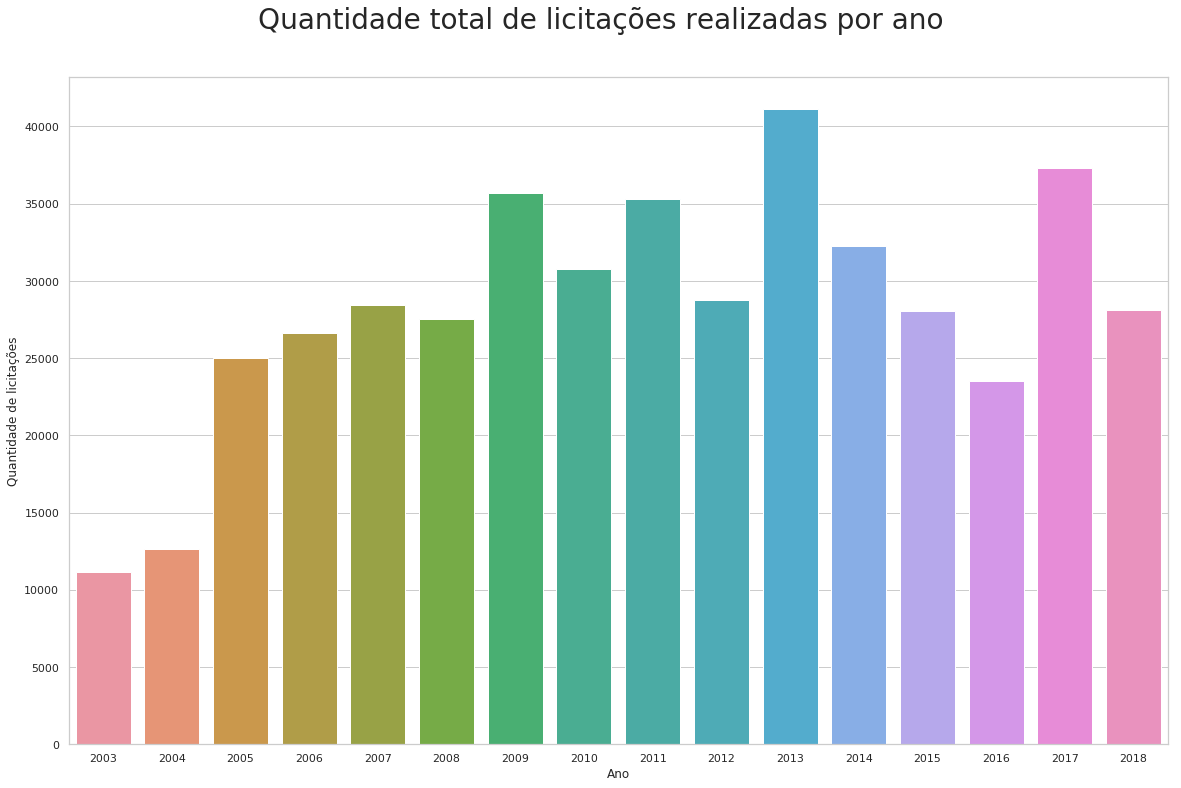

In [53]:
lic_prop_jur['year'] = pd.DatetimeIndex(lic_prop_jur['dt_Homologacao']).year
ano = lic_prop_jur.year.value_counts().to_frame().reset_index().rename(columns = {"index" : "year", "year" : "qtd_lic_ano"}).astype(int)
sns.set(style="whitegrid")
ax = sns.barplot(x="year", y="qtd_lic_ano", data=ano, ci=None)
figure = ax.get_figure()    
sns.set(rc={'figure.figsize':(19.7,12.27)})
ax.set(xlabel='Ano', ylabel='Quantidade de licitações')
#ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), '.')))
figure.suptitle('Quantidade total de licitações realizadas por ano', y=0.96, fontsize=28)
figure.savefig('lic_ano.png', dpi=400, bbox_inches="tight")

In [171]:
ano

,year,qtd_lic_ano
0,2013,41128
1,2017,37292
2,2009,35687
3,2011,35332
4,2014,32270
5,2010,30780
6,2012,28787
7,2007,28423
8,2018,28092
9,2015,28076


### Qual o valor total das licitações realizadas por ano (podemos testar por mês também)?

Fazer um gráfico de barras onde apresente no eixo-x o ano e no eixo-y o valor total.


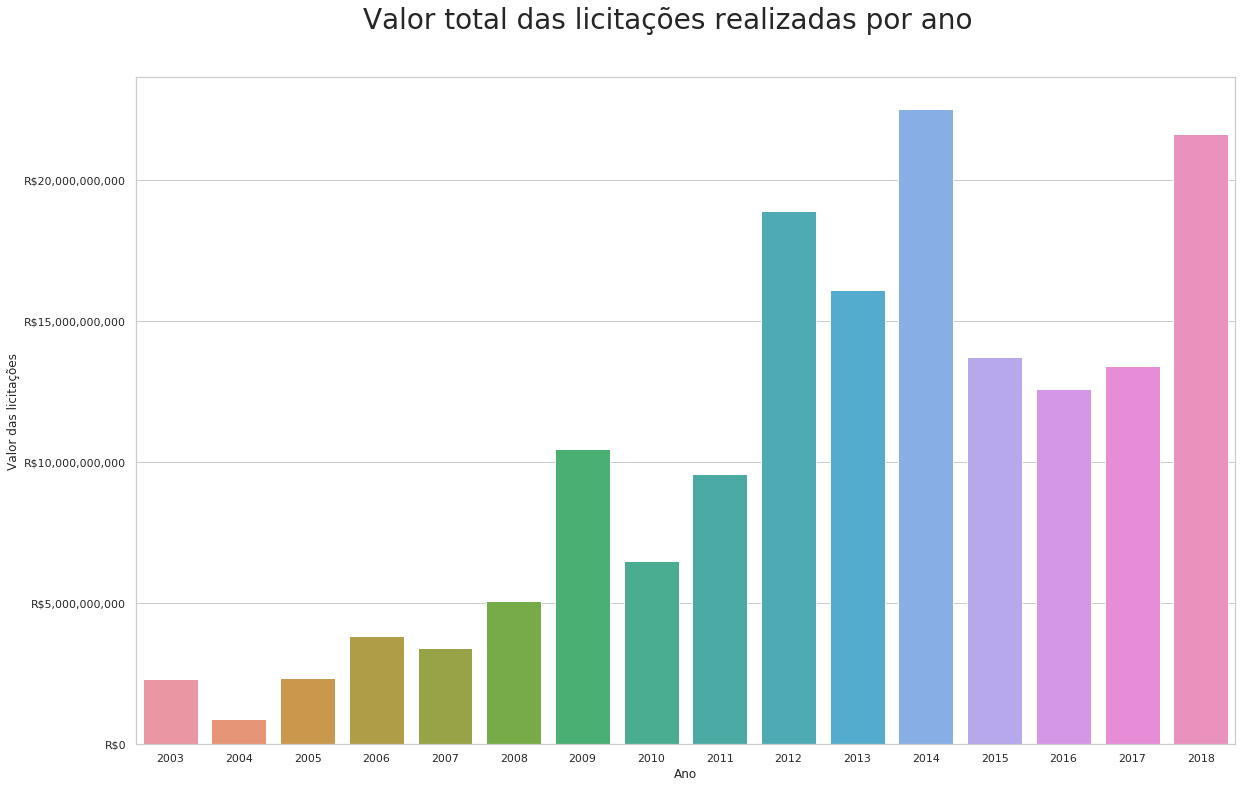

In [75]:
lic_prop_jur['year'] = lic_prop_jur.year.astype('Int64')
valor_lic_ano = lic_prop_jur.groupby(['year'])['vl_Licitacao']
v = valor_lic_ano.sum().to_frame().reset_index().rename(columns = {"index" : "year", "vl_Licitacao" : "valor"})
sns.set(style="whitegrid")
ax = sns.barplot(x="year", y="valor", data=v, ci=None)
figure = ax.get_figure()    
ax.set(xlabel='Ano', ylabel='Valor das licitações')
fmt = 'R${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
figure.suptitle('Valor total das licitações realizadas por ano', y=0.96, fontsize=28)
figure.savefig('valor_lic_ano.png', dpi=400, bbox_inches="tight")

In [201]:
v

,year,valor
0,2003,2.295293e+09
1,2004,9.083188e+08
2,2005,2.353095e+09
3,2006,3.852409e+09
4,2007,3.399130e+09
5,2008,5.080257e+09
6,2009,1.046496e+10
7,2010,6.478423e+09
8,2011,9.575898e+09
9,2012,1.887398e+10


### Quantas empresas participaram de licitações no último mandato?

In [123]:
empresas = mandato.nome_proponente.value_counts()
empresas.count()

22492

### Qual o valor total das licitações realizadas no último mandato?

In [128]:
mandato.vl_Licitacao.sum()

19486453859.681305

### Qual a quantidade total de licitações realizadas no último mandato?

In [130]:
mandato.qtd_ofertada.count()

50259

### Qual a quantidade total de licitações realizadas por tipo de licitação no último mandato (Pregão, Convite, etc)?

In [204]:
mandato.tipo_licitacao.value_counts()

Pregão Presencial                                     28519
Inexigível                                             6449
Dispensa por outros motivos                            5359
Chamada Pública                                        2739
Tomada de Preços                                       2356
Convite                                                1421
Adesão a Registro de Preço                             1386
Pregão Eletrônico                                       945
Pregão (Eletrônico e Presencial)                        435
Concurso                                                217
Leilão                                                  196
Concorrência                                            156
Dispensa por Valor                                       78
Sem Licitação                                             2
RDC - Regime Diferenciado de Contratações Públicas        1
Name: tipo_licitacao, dtype: int64